In [1]:
import nltk, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download(['names', 'stopwords', 'averaged_perceptron_tagger', 'vader_lexicon', 'punkt', 'state_union'])
!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package names to /home/pi/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /home/pi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/pi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package state_union to /home/pi/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [2]:
news_sources = ['cnn', 'fox', 'reuters']
search_terms = ['george floyd', 'black lives matter', 'all lives matter']
def load_news_articles():    
    df = pd.DataFrame()
    for each_source in news_sources:
        all_articles = pd.DataFrame()
        for each_term in search_terms:
            label_name = each_term.replace(' ', '-')
            file_name = f'scrappers/articles/{label_name}-posts-{each_source}.json'
            _file = open(file_name, 'r')
            _term_source_df = pd.read_json(_file)
            _term_source_df['search_term'] = each_term
            all_articles = all_articles.append(_term_source_df)
        all_articles['news_source'] = each_source
        df = df.append(all_articles)
    return df


def cleantext(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  regex = re.compile(r'[\n\r\t]')
  cleantext = re.sub(regex, ' ', cleantext)
  return cleantext


In [3]:
df = load_news_articles()
df.headline = df.headline.apply(cleantext)
df.text = df.text.apply(cleantext)
df[df.news_source == 'reuters']

,url,headline,published_date,text,search_term,news_source
0,/article/uk-factcheck-false-george-soros-claim...,Fact check: False claims about George Soros,2020-06-18,By Reuters Staff 17 MIN READ Update September ...,george floyd,reuters
1,/article/idUSKCN24W24M,Portland protesters put out fires as feds with...,2020-07-31,"By Deborah Bloom 4 MIN READ PORTLAND, Ore. (Re...",george floyd,reuters
2,/article/idUSKCN24W2QD,"In Portland, some Black activists frustrated w...",2020-07-31,By Deborah Bloom 4 MIN READ PORTLAND (Reuters)...,george floyd,reuters
3,/article/idUSKCN24W2OK,Fact check: Supreme Court did not allow federa...,2020-07-31,By Reuters Staff 7 MIN READ Posts shared on Fa...,george floyd,reuters
4,/article/idUSL2N2F20XI,"UPDATE 6-Portland has no fires, arrests as fed...",2020-07-31,"By Deborah Bloom 4 MIN READ PORTLAND, Ore. (Re...",george floyd,reuters
...,...,...,...,...,...,...
408,/article/idUSL4N2D837T,"US STOCKS-S&P 500 tops 3,000 on hopes of econo...",2020-05-26,"By Medha Singh, Uday Sampath Kumar 3 MIN READ ...",all lives matter,reuters
409,/article/idUSL4N2D82VK,US STOCKS-Wall St set to surge at open on reco...,2020-05-26,"By Medha Singh, Uday Sampath Kumar 3 MIN READ ...",all lives matter,reuters
410,/article/idUSL8N2CU7KL,SPECIAL REPORT-Bolsonaro brought in his genera...,2020-05-26,"By Stephen Eisenhammer, Gabriel Stargardter 18...",all lives matter,reuters
411,/article/idUSKBN231112,Chicago artist fills pesky potholes with pande...,2020-05-25,By Brendan O’Brien 3 MIN READ Slideshow ( 7 im...,all lives matter,reuters


In [4]:
stop_words = nltk.corpus.stopwords.words("english")
def text_pre_process(text):
    tokenized = nltk.word_tokenize(text.lower())
    words = [w for w in tokenized if w.isalpha()]
    words = [w for w in words if w.lower() not in stop_words]
    return words

    
            
    

In [5]:
df['pre_processed'] = df.text.apply(text_pre_process)
df.head()

,url,headline,published_date,text,search_term,news_source,pre_processed
0,https://www.cnn.com/2020/05/27/us/george-floyd...,This is how loved ones want us to remember Geo...,2020-05-27,(CNN)George Floyd moved to Minnesota for a fre...,george floyd,cnn,"[cnn, george, floyd, moved, minnesota, fresh, ..."
1,https://www.cnn.com/2020/06/16/us/george-floyd...,Somebody used a decal to rename a Minneapolis ...,2020-06-16,(CNN)A Minneapolis park got a name change over...,george floyd,cnn,"[cnn, minneapolis, park, got, name, change, we..."
2,https://www.cnn.com/2020/06/08/us/nascar-georg...,NASCAR legends voice support for George Floyd ...,2020-06-08,(CNN)NASCAR drivers have joined the growing li...,george floyd,cnn,"[cnn, nascar, drivers, joined, growing, list, ..."
3,https://www.cnn.com/2020/06/29/us/george-floyd...,Judge threatens to move George Floyd murder tr...,2020-06-29,(CNN)The former Minneapolis police officer cha...,george floyd,cnn,"[cnn, former, minneapolis, police, officer, ch..."
4,https://www.cnn.com/2020/06/02/us/floyd-maywea...,Boxing champ Floyd Mayweather will pay for Geo...,2020-06-02,(CNN)Boxing champion Floyd Mayweather will pay...,george floyd,cnn,"[cnn, boxing, champion, floyd, mayweather, pay..."


*****************************************
------- News Source cnn -------
*****************************************
Keyword: george floyd -------
Total news article:   (441, 7)
Keyword: black lives matter -------
Total news article:   (227, 7)
Keyword: all lives matter -------
Total news article:   (168, 7)
####################################


*****************************************
------- News Source fox -------
*****************************************
Keyword: george floyd -------
Total news article:   (100, 7)
Keyword: black lives matter -------
Total news article:   (100, 7)
Keyword: all lives matter -------
Total news article:   (98, 7)
####################################


*****************************************
------- News Source reuters -------
*****************************************
Keyword: george floyd -------
Total news article:   (1637, 7)
Keyword: black lives matter -------
Total news article:   (590, 7)
Keyword: all lives matter -------
Total news article:   

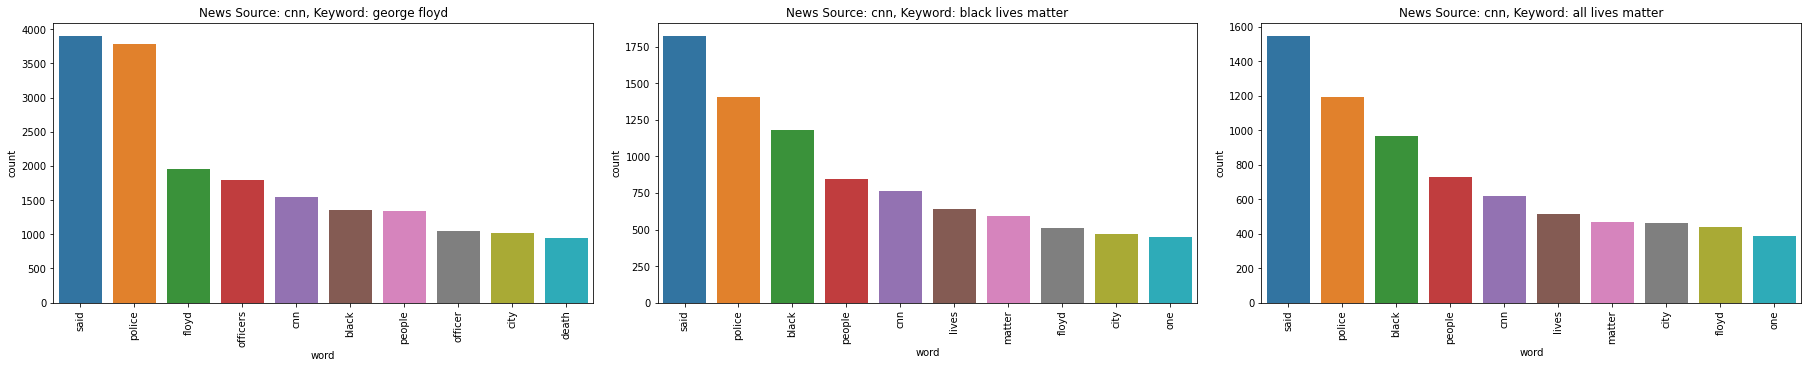

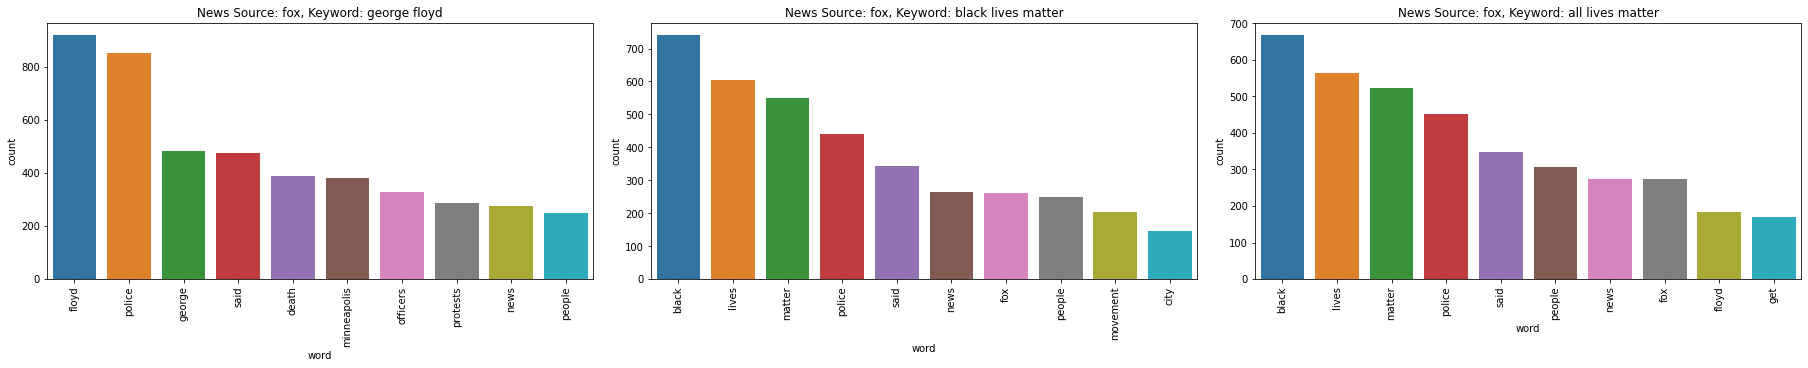

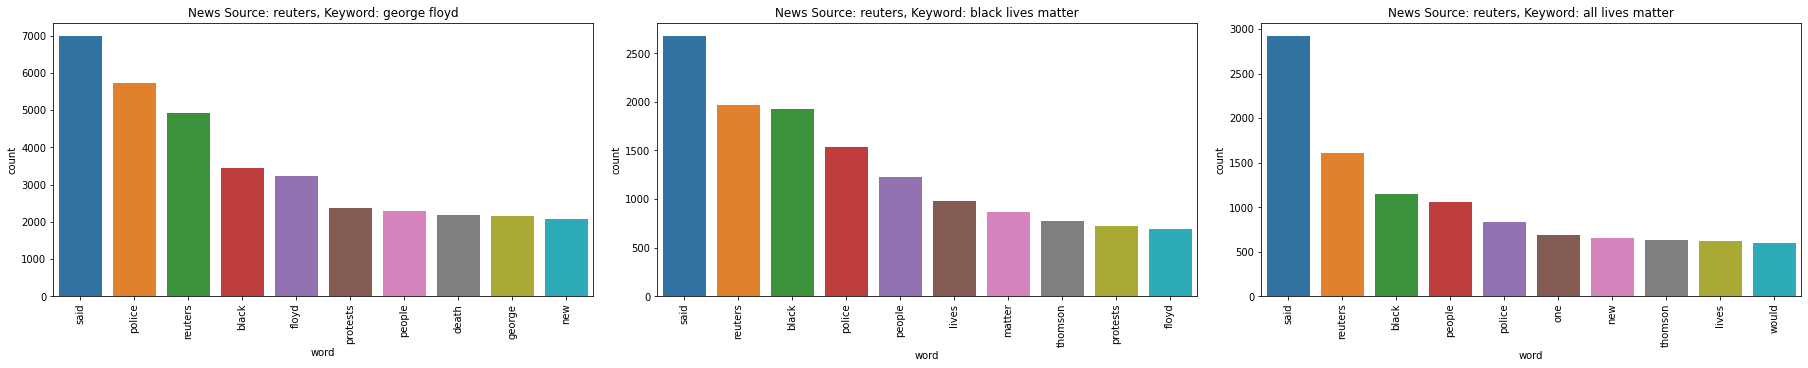

In [6]:
cnn_df = df[df.news_source == 'cnn']
fox_df = df[df.news_source == 'fox']
reuter_df = df[df.news_source == 'reuters']

flatten_list = lambda lst: [each for each_list in lst for each in each_list]
for each_source in news_sources:
    fig, axes = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
    _source_df = df[df.news_source == each_source]
    print('*****************************************')
    print(f"------- News Source {each_source} -------")
    print('*****************************************')
    for index, each_term in enumerate(search_terms):
        term_df = _source_df[_source_df.search_term == each_term]
        print(f"Keyword: {each_term} -------")
        print("Total news article:  ", term_df.shape)
        _freq_dist = nltk.FreqDist(flatten_list(term_df.pre_processed))
        _common = _freq_dist.most_common(10)
        temp_df = pd.DataFrame(_common, columns=['word', 'count'])
        f = sns.barplot(x='word', y='count', data=temp_df, ax=axes[index])
        axes[index].set_title(f'News Source: {each_source}, Keyword: {each_term}')
        default_labels = f.get_xticklabels()
        axes[index].set_xticklabels(labels=default_labels, rotation=90)
        print('====================================')
    plt.savefig(f'output/common-words {each_source}.jpeg')
    print("####################################\n\n")


<ipython-input-24-bd72b1a5da71>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_df['sentiment'] = cnn_df.text.apply(sentiment_analysis)
<ipython-input-24-bd72b1a5da71>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reuter_df['sentiment'] = reuter_df.text.apply(sentiment_analysis)
<ipython-input-24-bd72b1a5da71>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

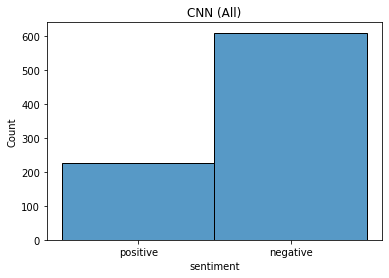

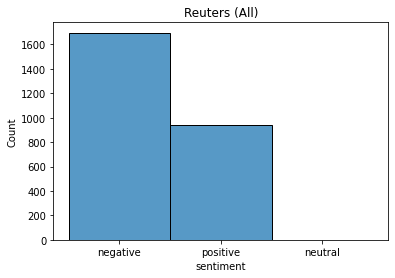

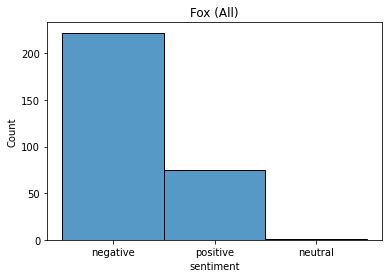

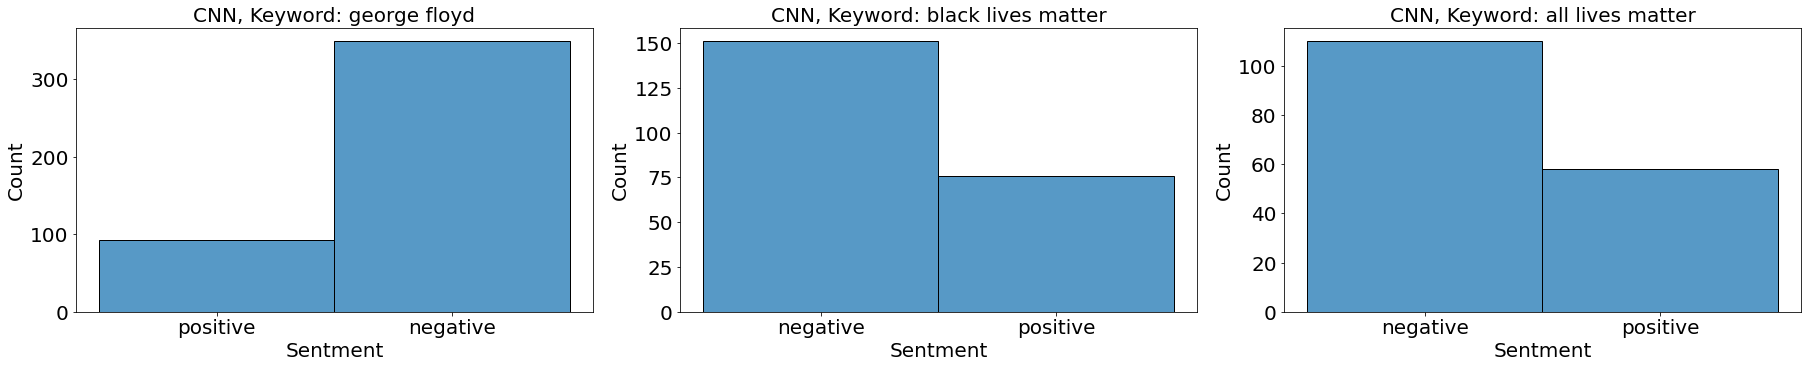

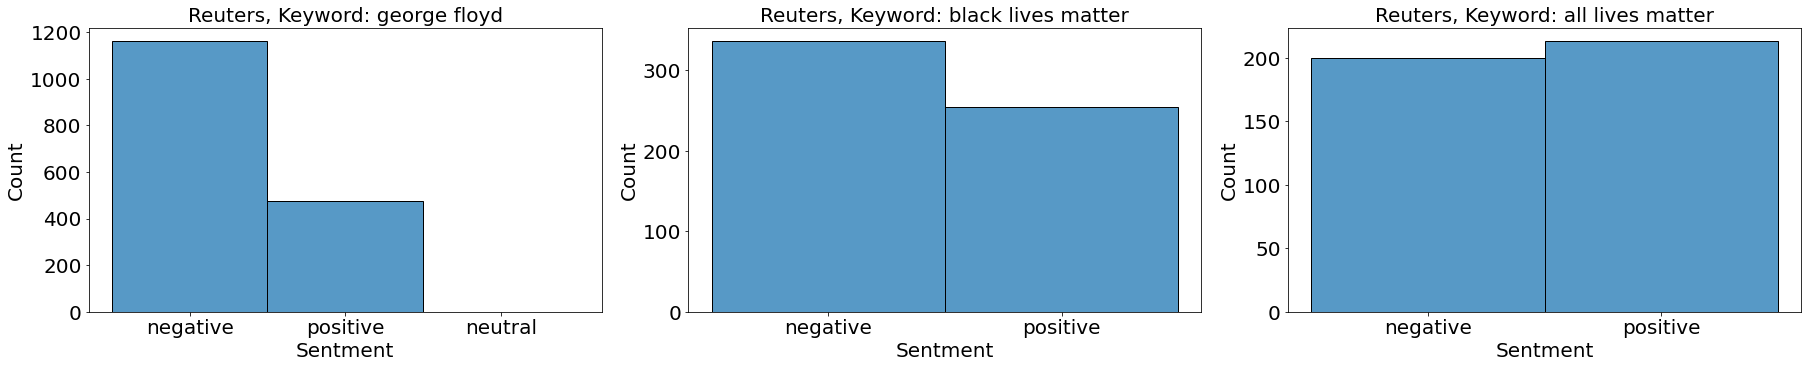

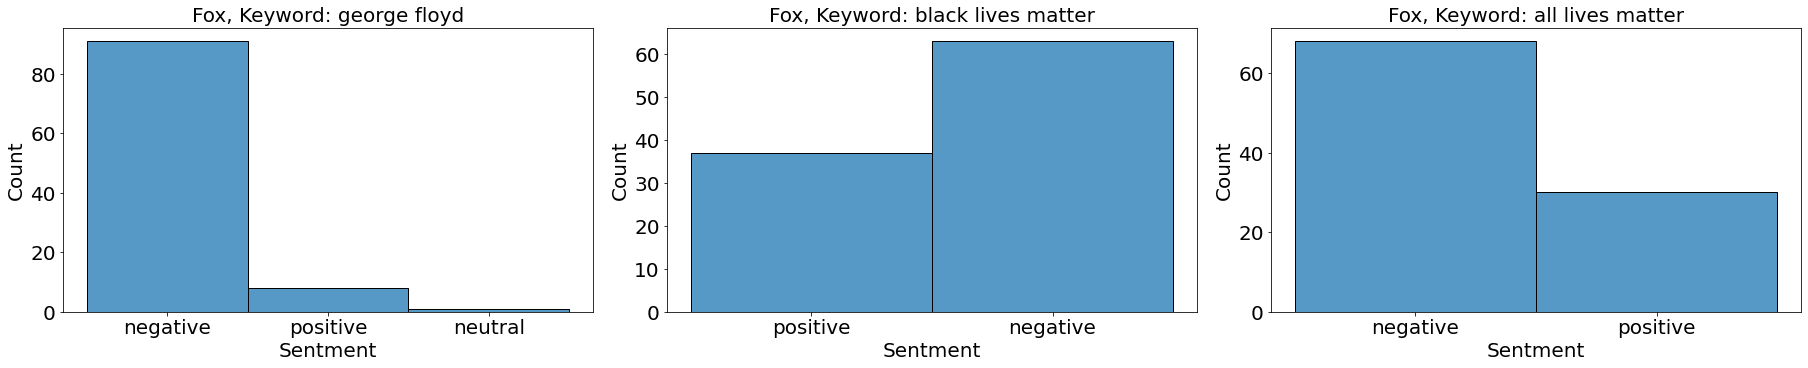

In [24]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    sentiments = analyzer.polarity_scores(text)
#     print(sentiments)
    if sentiments['compound'] < 0:
        return 'negative'
    elif sentiments['compound'] > 0:
        return 'positive'
    elif sentiments['compound'] == 0:
        return 'neutral'
    
cnn_df['sentiment'] = cnn_df.text.apply(sentiment_analysis)
plt.figure()
sns.histplot(cnn_df.sentiment)
plt.title('CNN (All)')
plt.savefig('output/cnn-all-sentiment.jpeg', bbox_inches='tight')

reuter_df['sentiment'] = reuter_df.text.apply(sentiment_analysis)
plt.figure()
sns.histplot(reuter_df.sentiment)
plt.title('Reuters (All)')
plt.savefig('output/reuters-sentiments.jpeg-all-sentiment.jpeg', bbox_inches='tight')

fox_df['sentiment'] = fox_df.text.apply(sentiment_analysis)
plt.figure()
sns.histplot(fox_df.sentiment)
plt.title('Fox (All)')
plt.savefig('output/fox-all-sentiment.jpeg', bbox_inches='tight')

fig_cnn, axes_cnn = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
fig_reuters, axes_reuters = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
fig_fox, axes_fox = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
for index, each_term in enumerate(search_terms):
    cnn = sns.histplot(cnn_df[cnn_df.search_term == each_term].sentiment, ax=axes_cnn[index])
    reuters = sns.histplot(reuter_df[reuter_df.search_term == each_term].sentiment, ax=axes_reuters[index])
    fox = sns.histplot(fox_df[fox_df.search_term == each_term].sentiment, ax=axes_fox[index])
    axes_cnn[index].set_title(f'CNN, Keyword: {each_term}', fontsize=20)
    axes_reuters[index].set_title(f'Reuters, Keyword: {each_term}', fontsize=20)
    axes_fox[index].set_title(f'Fox, Keyword: {each_term}', fontsize=20)
    # cnn
    axes_cnn[index].set_xlabel('Sentment', fontsize=20)
    axes_cnn[index].set_ylabel('Count', fontsize=20)
    axes_cnn[index].tick_params(axis="x", labelsize=20) 
    axes_cnn[index].tick_params(axis="y", labelsize=20) 
    # reuters
    axes_reuters[index].set_xlabel('Sentment', fontsize=20)
    axes_reuters[index].set_ylabel('Count', fontsize=20)
    axes_reuters[index].tick_params(axis="x", labelsize=20) 
    axes_reuters[index].tick_params(axis="y", labelsize=20) 
    # Fox news
    axes_fox[index].set_xlabel('Sentment', fontsize=20)
    axes_fox[index].set_ylabel('Count', fontsize=20)
    axes_fox[index].tick_params(axis="x", labelsize=20) 
    axes_fox[index].tick_params(axis="y", labelsize=20) 
    

    
#     p.set_xticklabels(xlabels, size=5)
# fig_cnn.l
fig_cnn.savefig('output/cnn-sentiments.jpeg', bbox_inches='tight')
fig_reuters.savefig('output/reuters-sentiments.jpeg', bbox_inches='tight')
fig_fox.savefig('output/fox-sentiments.jpeg', bbox_inches='tight')

    


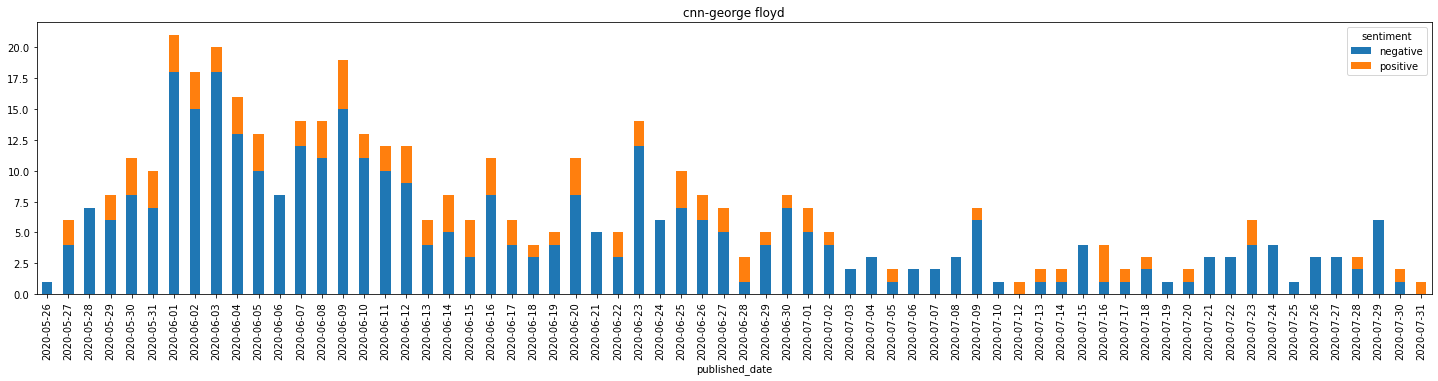

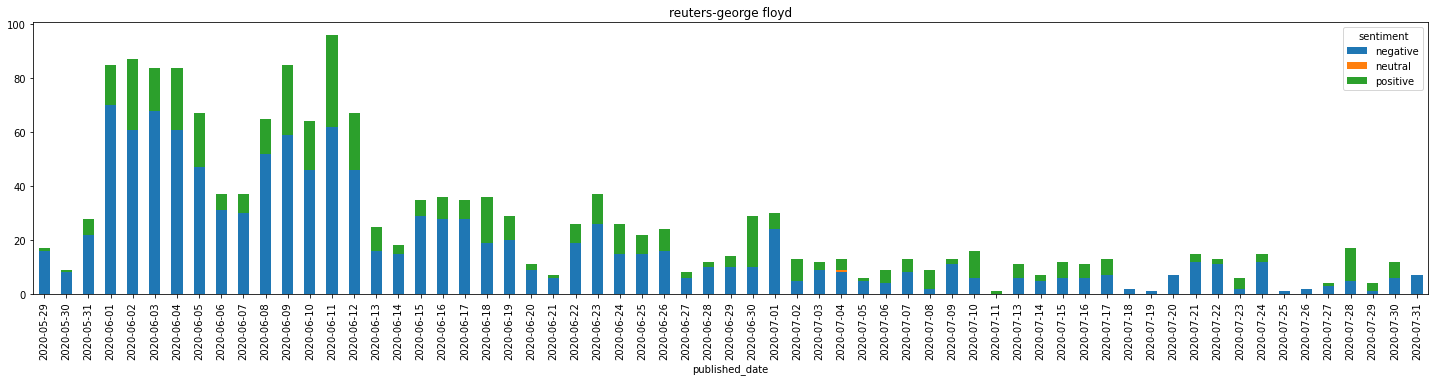

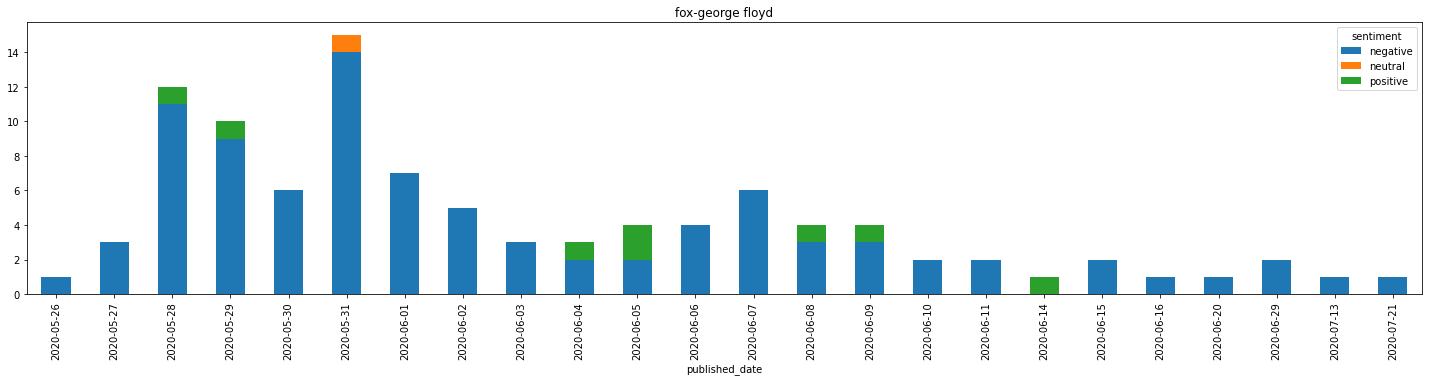

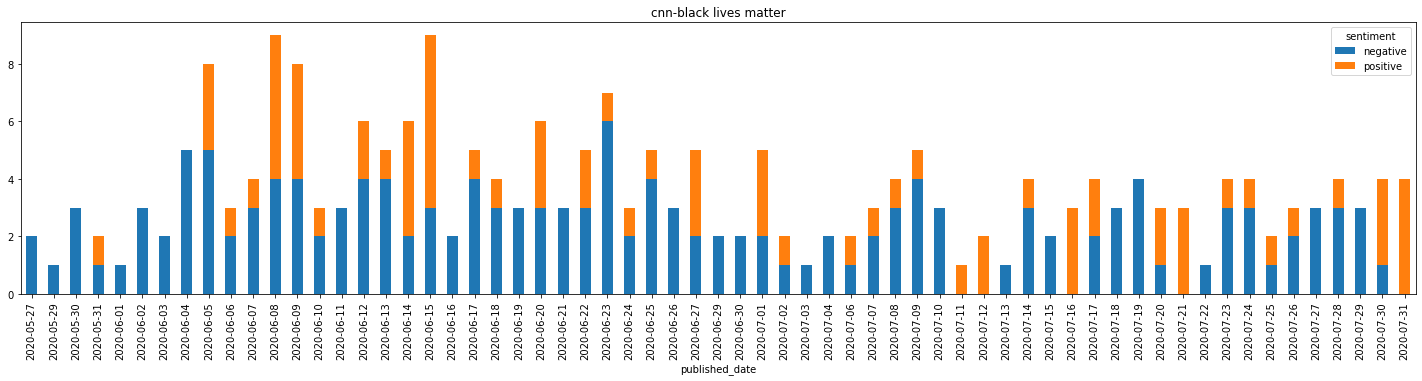

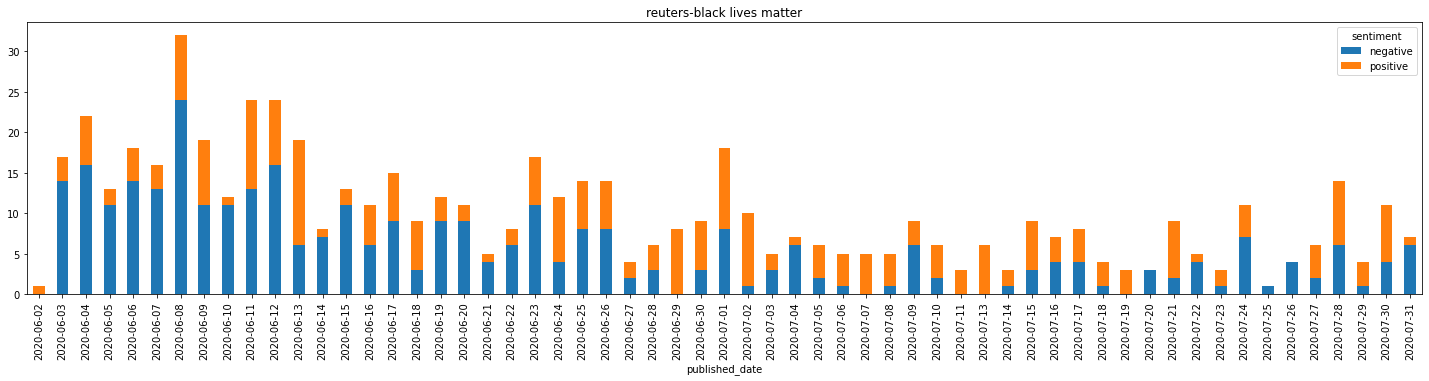

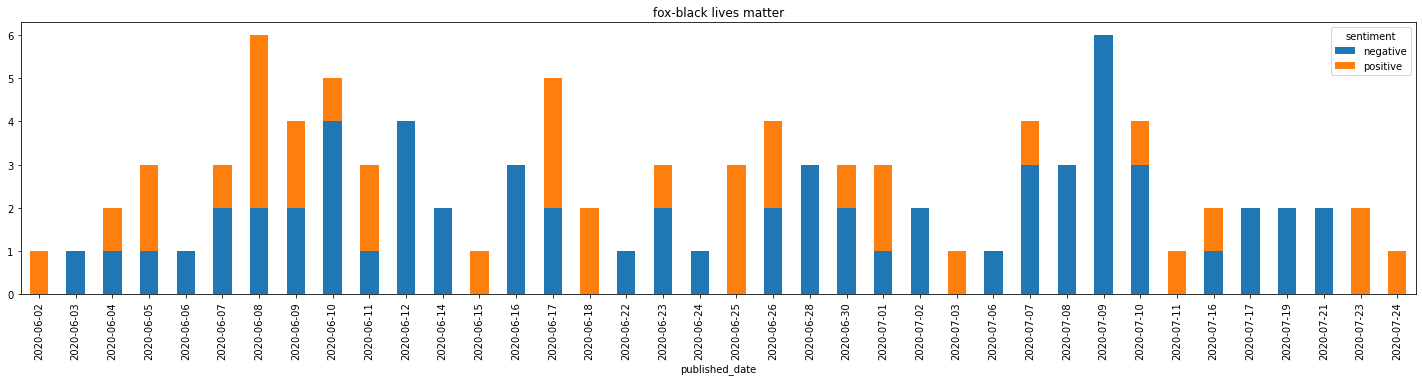

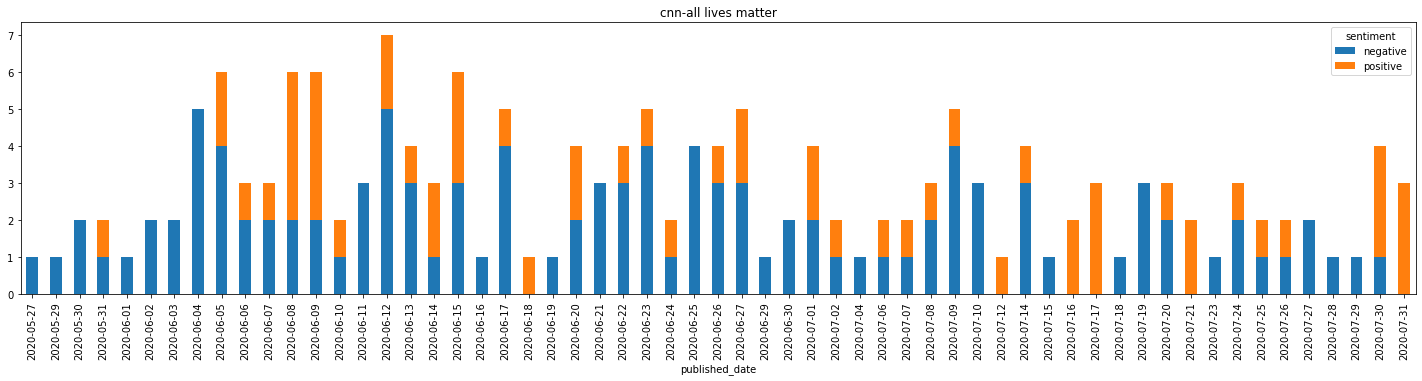

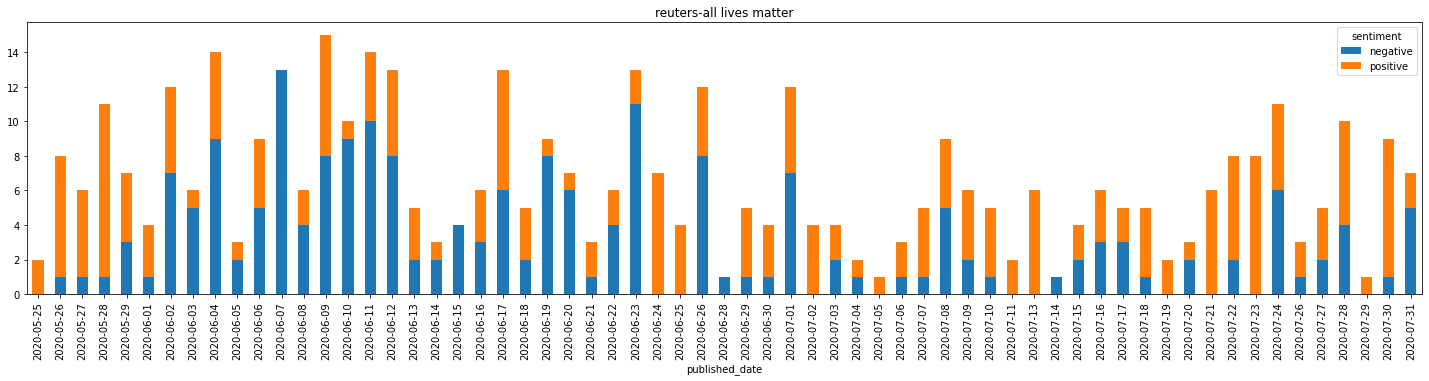

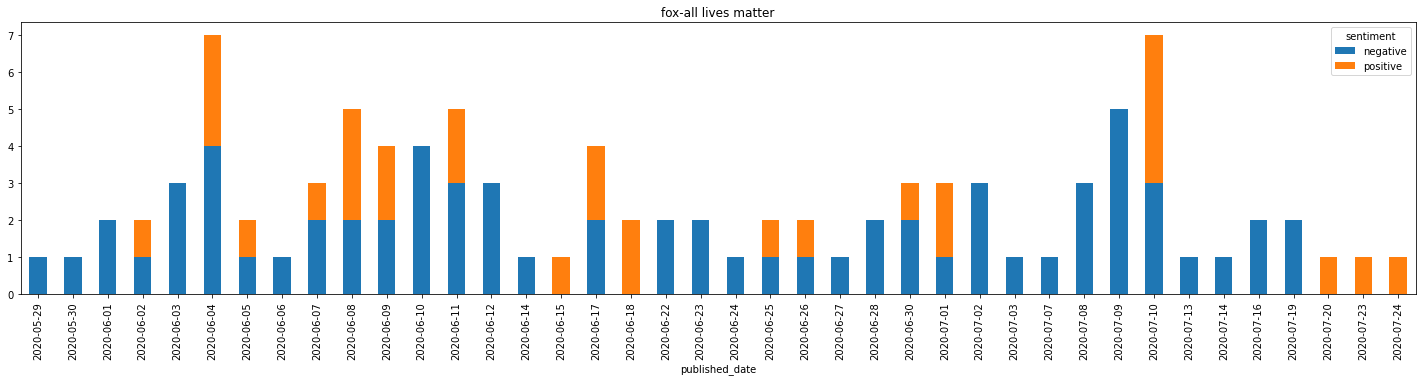

In [8]:
def plot_stacked_bar(temp_df, source, term):
    g = temp_df.groupby(['sentiment', 'published_date']).size().to_frame('count').reset_index()
    p = g.pivot_table('count', index='published_date', columns=['sentiment'])
    p = p.fillna(0)
    fig = p.plot.bar(stacked=True, figsize=(25,5))
    plt.title(f'{source}-{term}')
    plt.savefig(f'output/timeline-{source}-({term}).jpeg', bbox_inches='tight')
    

for each_term in search_terms:
    temp_cnn_df = cnn_df[cnn_df.search_term == each_term]
    temp_reuters_df = reuter_df[reuter_df.search_term == each_term]
    temp_fox_df = fox_df[fox_df.search_term == each_term]
    plot_stacked_bar(temp_cnn_df, 'cnn', each_term)
    plot_stacked_bar(temp_reuters_df, 'reuters', each_term)
    plot_stacked_bar(temp_fox_df, 'fox', each_term)
    




<h1> Positive Articles headline and Body for CNN </h1>

In [9]:
for each_term in search_terms:
    display(f'--------------- CNN - {each_term}----------------')
    for _, each in cnn_df[(cnn_df.search_term == each_term) & (cnn_df.sentiment == 'positive')][:5].iterrows():
        print("Headline: ", each['headline'])
#         print('############')
#         print("Article: ", each['text'])
#         print('############')
        
        
    

'--------------- CNN - george floyd----------------'

Headline:  This is how loved ones want us to remember George Floyd
Headline:  NASCAR legends voice support for George Floyd protests
Headline:  George Floyd changed the world after US kept its 'knee on our neck,' Sharpton says
Headline:  Houston police officers pay their respects to George Floyd at a mural in his hometown
Headline:  Minneapolis police release 911 call that led to encounter with George Floyd


'--------------- CNN - black lives matter----------------'

Headline:  Baseball is making Black Lives Matter center stage on Opening Day
Headline:  He proposed to his girlfriend at a Black Lives Matter protest to celebrate black love
Headline:  Justin Trudeau takes a knee at Black Lives Matter demonstration on Parliament Hill
Headline:  Atlanta's WNBA team supports Black Lives Matter after pushback from co-owner, a US senator
Headline:  This couple's wedding first look happened in front of a Black Lives Matter protest


'--------------- CNN - all lives matter----------------'

Headline:  Jason Mraz is donating all the earnings from his new album to Black Lives Matter and other groups
Headline:  Baseball is making Black Lives Matter center stage on Opening Day
Headline:  Justin Trudeau takes a knee at Black Lives Matter demonstration on Parliament Hill
Headline:  Police groups want to paint a 'Blue Lives Matter' street mural in New York City, too
Headline:  This couple's wedding first look happened in front of a Black Lives Matter protest


<h1> Negative Articles headline and Body for CNN </h1>

In [10]:
for each_term in search_terms:
    display(f'--------------- CNN - {each_term}----------------')
    for _, each in cnn_df[(cnn_df.search_term == each_term) & (cnn_df.sentiment == 'negative')][:5].iterrows():
        print("Headline: ", each['headline'])
#         print('############')
#         print("Article: ", each['text'])
#         print('############')
        
        
    

'--------------- CNN - george floyd----------------'

Headline:  Somebody used a decal to rename a Minneapolis park after George Floyd
Headline:  Judge threatens to move George Floyd murder trial out of Minneapolis
Headline:  Boxing champ Floyd Mayweather will pay for George Floyd's funeral, ESPN reports
Headline:  Surveillance video does not support police claims that George Floyd resisted arrest
Headline:  New video appears to show three police officers kneeling on George Floyd


'--------------- CNN - black lives matter----------------'

Headline:  All Lives Matter protesters re-enacted George Floyd's death as a Black Lives Matter march went by
Headline:  Black Lives Matter street mural vandalized outside Trump Tower
Headline:  Vermont Black Lives Matter roadway murals defaced, state police say
Headline:  The three reasons Black Lives Matter marchers refuse to quit
Headline:  The ESPY Awards make sure viewers know Black Lives Matter


'--------------- CNN - all lives matter----------------'

Headline:  All Lives Matter protesters re-enacted George Floyd's death as a Black Lives Matter march went by
Headline:  The three reasons Black Lives Matter marchers refuse to quit
Headline:  The ESPY Awards make sure viewers know Black Lives Matter
Headline:  Washington's new Black Lives Matter street mural is captured in satellite image
Headline:  How Black Lives Matter went from a hashtag to a global rallying cry


<h1> Positive Articles headline and Body for Reuters </h1>

In [11]:
for each_term in search_terms:
    display(f'--------------- Reuter - {each_term}----------------')
    temp_df = reuter_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'positive')][:5].iterrows():
        print("Headline: ", each['headline'])
#         print('############')
#         print("Article: ", each['text'])
#         print('############')
        
        
    

'--------------- Reuter - george floyd----------------'

Headline:  Brands tout Black heritage as some shoppers question authenticity
Headline:  UPDATE 2-LVMH's takeover of Tiffany seen as uncertain -WWD
Headline:  UK health minister urges people not to attend large demonstrations
Headline:  GLOBAL MARKETS-Shares cruise to three-month highs, dollar under protest pressure
Headline:  Global equities cruise to three-month highs, dollar under protest pressure


'--------------- Reuter - black lives matter----------------'

Headline:  Black girls and supporters surf around the world to honor George Floyd
Headline:  Hamilton criticises F1 after 'rushed' anti-racism gesture
Headline:  In Arizona, school reopening sparks protest movement
Headline:  LGBT+ Pride marches return to radical roots to support Black Lives Matter
Headline:  Former U.S. coach Arena says national anthem in pro leagues is 'inappropriate'


'--------------- Reuter - all lives matter----------------'

Headline:  On trial on riot charges, Hong Kong newlyweds prepared for life apart
Headline:  Hackers and hucksters reinvigorate 'Anonymous' brand amid protests
Headline:  'No more rainbow capitalism' as protests shine light on Black trans lives
Headline:  California, Southwest face new coronavirus woes as U.S. economy reopens
Headline:  Floyd's death spurs 'Gen Z' activists to set up new D.C. rights group


<h1> Negative Articles headline and Body for Reuters </h1>

In [12]:
for each_term in search_terms:
    display(f'--------------- Reuter - {each_term}----------------')
    temp_df = reuter_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'negative')][:5].iterrows():
        print("Headline: ", each['headline'])
#         print('############')
#         print("Article: ", each['text'])
#         print('############')
        
        
    

'--------------- Reuter - george floyd----------------'

Headline:  Mutineers defeat FaZe to win CDL Minnesota finale
Headline:  Tens of thousands join Black Lives Matter protest in London
Headline:  One of four Minneapolis police charged over Floyd's death freed on bail
Headline:  Biden says military would intervene if Trump loses election but refuses to leave
Headline:  Klobuchar pulls back from consideration as Biden's running mate


'--------------- Reuter - black lives matter----------------'

Headline:  Australia Black Lives Matter rally to go ahead despite court ban
Headline:  UPDATE 1-Kenyan museum, Mau Mau fighter shed light on British colonial abuses
Headline:  Raymond James fires employee who confronted Black Lives Matter demonstrator
Headline:  Soccer: Premier League launches reporting system for online abuse
Headline:  Australia PM tells locals to avoid Black Lives Matter protests due to COVID-19 threat


'--------------- Reuter - all lives matter----------------'

Headline:  John Lewis, U.S. congressman and sharecropper's son, was civil rights hero
Headline:  Black actors and singers to headline livestream for global gay pride
Headline:  Breakingviews - Review: Market twists and turns, unraveled
Headline:  LeBron addresses Breonna Taylor, social injustice
Headline:  Motor racing: Hamilton condemns Ecclestone's 'ignorant' racism comments


<h1> Positive Articles headline and Body for Fox </h1>

In [27]:
for each_term in search_terms:
    display(f'--------------- Fox - {each_term}----------------')
    temp_df = fox_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'positive')][:5].iterrows():
        print("Headline: ", each['headline'])
#         print('############')
#         print("Article: ", each['text'])
#         print('############')
        
        
    

'--------------- Fox - george floyd----------------'

Headline:  Ministries hold daily services at site of George Floyd's death: 'From hatred to healing and hope'
Headline:  Mainstream media falsely frames Trump's 'great day' George Floyd remarks on jobs report instead of equality under law
Headline:  Gov. Kristi Noem: George Floyd protests – They served their purpose. Now let's do this to solve the problem
Headline:  George Floyd GoFundMe surpasses $13 million, breaks donation record
Headline:  George Floyd case: Family, friends describe him as 'gentle giant' looking for a new life


'--------------- Fox - black lives matter----------------'

Headline:  Beauty blogger apologizes for blackface makeup to 'support' Black Lives Matter: report
Headline:  Amid unrest, Black Lives Matter and other social justice groups see fundraising windfall
Headline:  Wedding photographer donates deposit after bride demands refund over support for Black Lives Matter
Headline:  De Blasio: NYC will paint 'Black Lives Matter' on major streets in all 5 boroughs
Headline:  Jason Whitlock: NFL showing a 'failure of leadership' on anthem, caving to pressure from Black Lives Matter


'--------------- Fox - all lives matter----------------'

Headline:  Nationals to display Black Lives Matter stencil on pitcher's mound in MLB opener against Yankees
Headline:  Christian figures, symbols targeted amid ongoing protests
Headline:  Herschel Walker, Mark Cuban square off over BLM on the field
Headline:  Wedding photographer donates deposit after bride demands refund over support for Black Lives Matter
Headline:  Southern Baptist president calls for members to declare: ‘Black lives matter’


<h1> Negative Articles headline and Body for Fox </h1>

In [13]:
for each_term in search_terms:
    display(f'--------------- Fox - {each_term}----------------')
    temp_df = fox_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'negative')][:5].iterrows():
        print("Headline: ", each['headline'])
#         print('############')
#         print("Article: ", each['text'])
#         print('############')
        
        
    

'--------------- Fox - george floyd----------------'

Headline:  Miami-area police, protesters pray together amid George Floyd unrest
Headline:  New York City lifting curfew early amid George Floyd protests, de Blasio says
Headline:  Santa Monica faces riots, looting amid George Floyd protests
Headline:  George Floyd, fired officer Derek Chauvin worked at same Minneapolis nightclub
Headline:  Minneapolis George Floyd video compares to Kaepernick taking a knee, another Eric Garner 'I can't breathe' case, activists say


'--------------- Fox - black lives matter----------------'

Headline:  Black Lives Matter moves to oust LA County's first black DA, saying not enough police prosecuted
Headline:  California pair charged with hate crime after Black Lives Matter mural cover-up: authorities
Headline:  Geraldo Rivera, Leo Terrell rip 'shameful, spiteful' de Blasio over 'Black Lives Matter' mural 'stunt'
Headline:  Leo Terrell: Black Lives Matter is 'profiting' on a 'false narrative'
Headline:  Justin Haskins: If you believe Black lives matter, support more funding for police — not less


'--------------- Fox - all lives matter----------------'

Headline:  DC activists say Dem mayor 'consistently on the wrong side' of Black Lives Matters issues
Headline:  Pink slams 'all lives matter' critics in the comments of her protest photo: 'Educate yourself'
Headline:  Twins' Max Kepler apologizes for wearing 'Blue Lives Matter' face mask after backlash
Headline:  Victor Davis Hanson: Our current protest movement and the fragility of the woke
Headline:  Black Lives Matter leader calls for defunding police: 'Black people do not trust politicians'


<ipython-input-43-d0ae93f0d094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnn_df['pre_text'] = cnn_df.pre_processed.apply(lambda x: " ".join(x))


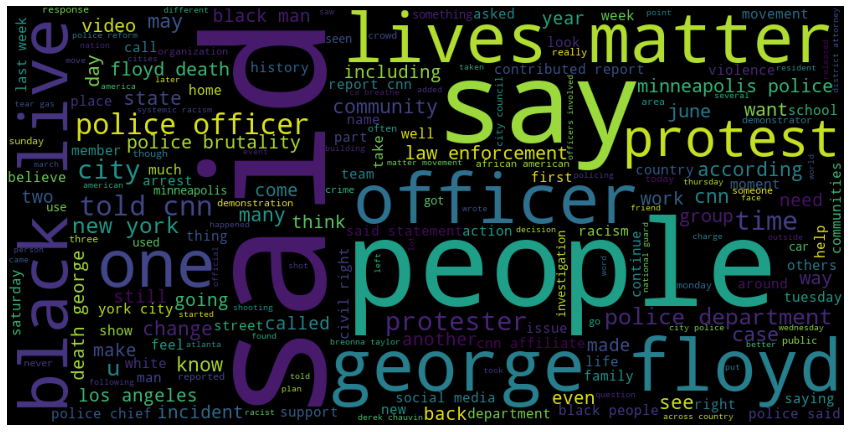

In [43]:
cnn_df['pre_text'] = cnn_df.pre_processed.apply(lambda x: " ".join(x))
strs = (" ").join(cnn_df.pre_text)
wordcloud = WordCloud(width = 1000, height = 500).generate(strs)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("output/cnn-word-cloud.png", bbox_inches='tight')
plt.show()
plt.close()

In [38]:
fox_df

,url,headline,published_date,text,search_term,news_source,pre_processed,sentiment
0,https://www.foxnews.com/us/george-floyd-cities...,"George Floyd unrest: Riots, fires, violence es...",2020-05-31,Protesters gather near White House as night fa...,george floyd,fox,"[protesters, gather, near, white, house, night...",negative
1,https://www.foxnews.com/us/who-is-george-floyd...,"George Floyd case: Family, friends describe hi...",2020-05-28,Pressure builds for criminal charges against M...,george floyd,fox,"[pressure, builds, criminal, charges, minneapo...",positive
2,https://www.foxnews.com/world/george-floyd-blm...,"George Floyd, BLM protests take place on 3 con...",2020-06-06,London protesters take over Hyde Park London p...,george floyd,fox,"[london, protesters, take, hyde, park, london,...",negative
3,https://www.foxnews.com/us/minnesota-gov-tim-w...,Minneapolis cop who knelt on handcuffed black ...,2020-05-29,Former Minneapolis officer Derek Chauvin arres...,george floyd,fox,"[former, minneapolis, officer, derek, chauvin,...",negative
4,https://www.foxnews.com/us/george-floyd-derek-...,"George Floyd, Derek Chauvin had run-ins while ...",2020-06-10,Fox News Flash top headlines for June 9 Fox Ne...,george floyd,fox,"[fox, news, flash, top, headlines, june, fox, ...",negative
...,...,...,...,...,...,...,...,...
93,https://www.foxnews.com/us/nyc-protest-abortio...,"Women handcuffed, cited while praying outside ...",2020-06-09,Fox News Flash top headlines for June 9 Fox Ne...,all lives matter,fox,"[fox, news, flash, top, headlines, june, fox, ...",negative
94,https://www.foxnews.com/lifestyle/chicago-boy-...,"Chicago boy, 9, stages solo Black Lives Matter...",2020-06-11,"Chicago boy, 9, stages solo Black Lives Matter...",all lives matter,fox,"[chicago, boy, stages, solo, black, lives, mat...",positive
95,https://www.foxnews.com/politics/sen-tim-scott...,Sen. Tim Scott calls demands to defund police ...,2020-06-07,Sen. Tim Scott on civil unrest: We need people...,all lives matter,fox,"[tim, scott, civil, unrest, need, people, lean...",negative
96,https://www.foxnews.com/media/philadelphia-new...,Philadelphia newspaper editor resigns after ‘B...,2020-06-07,Philadelphia orders removal of statue of contr...,all lives matter,fox,"[philadelphia, orders, removal, statue, contro...",negative


<ipython-input-42-888755deb426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['pre_text'] = fox_df.pre_processed.apply(lambda x: " ".join(x))


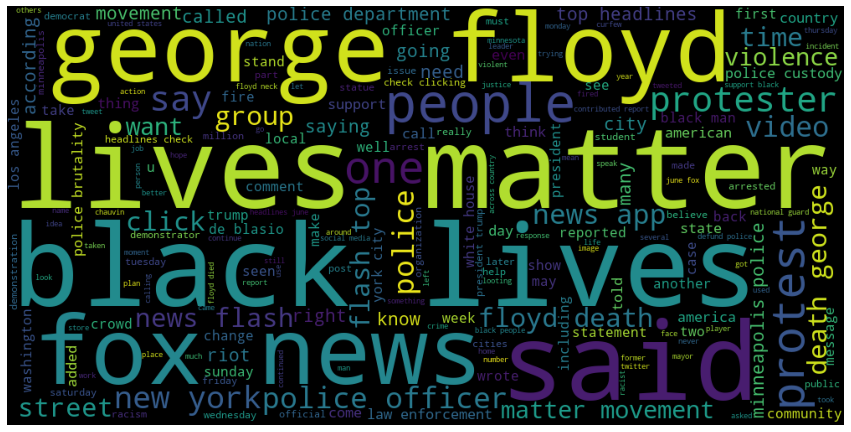

In [42]:
temp_df = fox_df
temp_df['pre_text'] = fox_df.pre_processed.apply(lambda x: " ".join(x))
strs = (" ").join(temp_df.pre_text)
wordcloud = WordCloud(width = 1000, height = 500).generate(strs)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("output/fox-word-cloud.png", bbox_inches='tight')
plt.show()
plt.close()

<ipython-input-41-b785234159b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['pre_text'] = temp_df.pre_processed.apply(lambda x: " ".join(x))


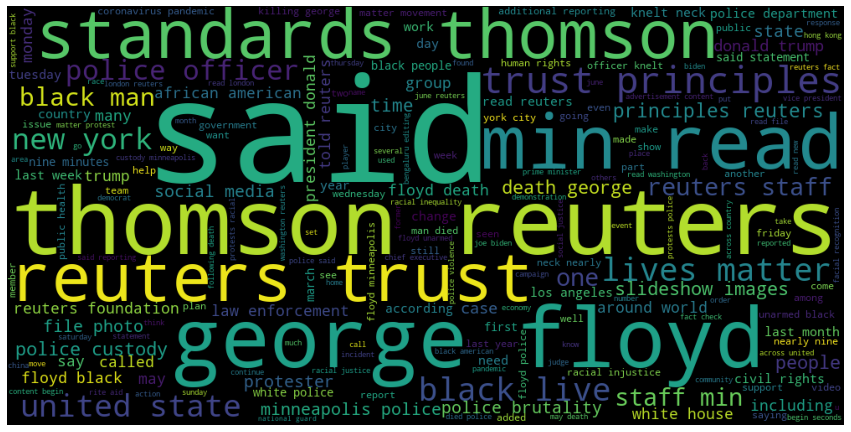

In [41]:
temp_df = reuter_df
temp_df['pre_text'] = temp_df.pre_processed.apply(lambda x: " ".join(x))
strs = (" ").join(temp_df.pre_text)
wordcloud = WordCloud(width = 1000, height = 500).generate(strs)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("output/reuter-word-cloud.png", bbox_inches='tight')
plt.show()
plt.close()